### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,silhouette_score,calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from scipy.cluster import hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
airlines=pd.ExcelFile('EastWestAirlines.xlsx')
airlines_df=pd.read_excel(airlines,sheet_name='data')
airlines_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Understanding

In [3]:
airlines_df.shape

(3999, 12)

In [4]:
airlines_df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airlines_df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

### Data Preprocessing

In [6]:
airlines_df.rename(columns={'Award?':'Award'},inplace=True)

In [7]:
X=airlines_df.drop('ID#',axis=1)

In [8]:
ss=StandardScaler()
scaled_X_array=ss.fit_transform(X)
scaled_X_df=pd.DataFrame(scaled_X_array,columns=airlines_df.columns[1:])
scaled_X_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


### Using Hierarchical Method

In [9]:
hierarchy=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
label_hierarchy=hierarchy.fit_predict(scaled_X_df)

In [10]:
airlines_df['label_hierarchy']=label_hierarchy
airlines_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [11]:
airlines_df['label_hierarchy'].nunique()

5

In [12]:
airlines_df[airlines_df['label_hierarchy']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0


In [13]:
airlines_df[airlines_df['label_hierarchy']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [14]:
airlines_df[airlines_df['label_hierarchy']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,2
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,2
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,2
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,2
121,124,205126,0,5,1,1,126630,45,2250,10,7668,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,2
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,2
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2


In [15]:
airlines_df[airlines_df['label_hierarchy']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,3
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,3
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,3
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,3
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,3
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,3
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,3
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,3
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,3


In [16]:
airlines_df[airlines_df['label_hierarchy']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
343,348,112501,0,1,1,2,19140,11,0,0,7101,0,4
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,4
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,4
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,4
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,4
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,4


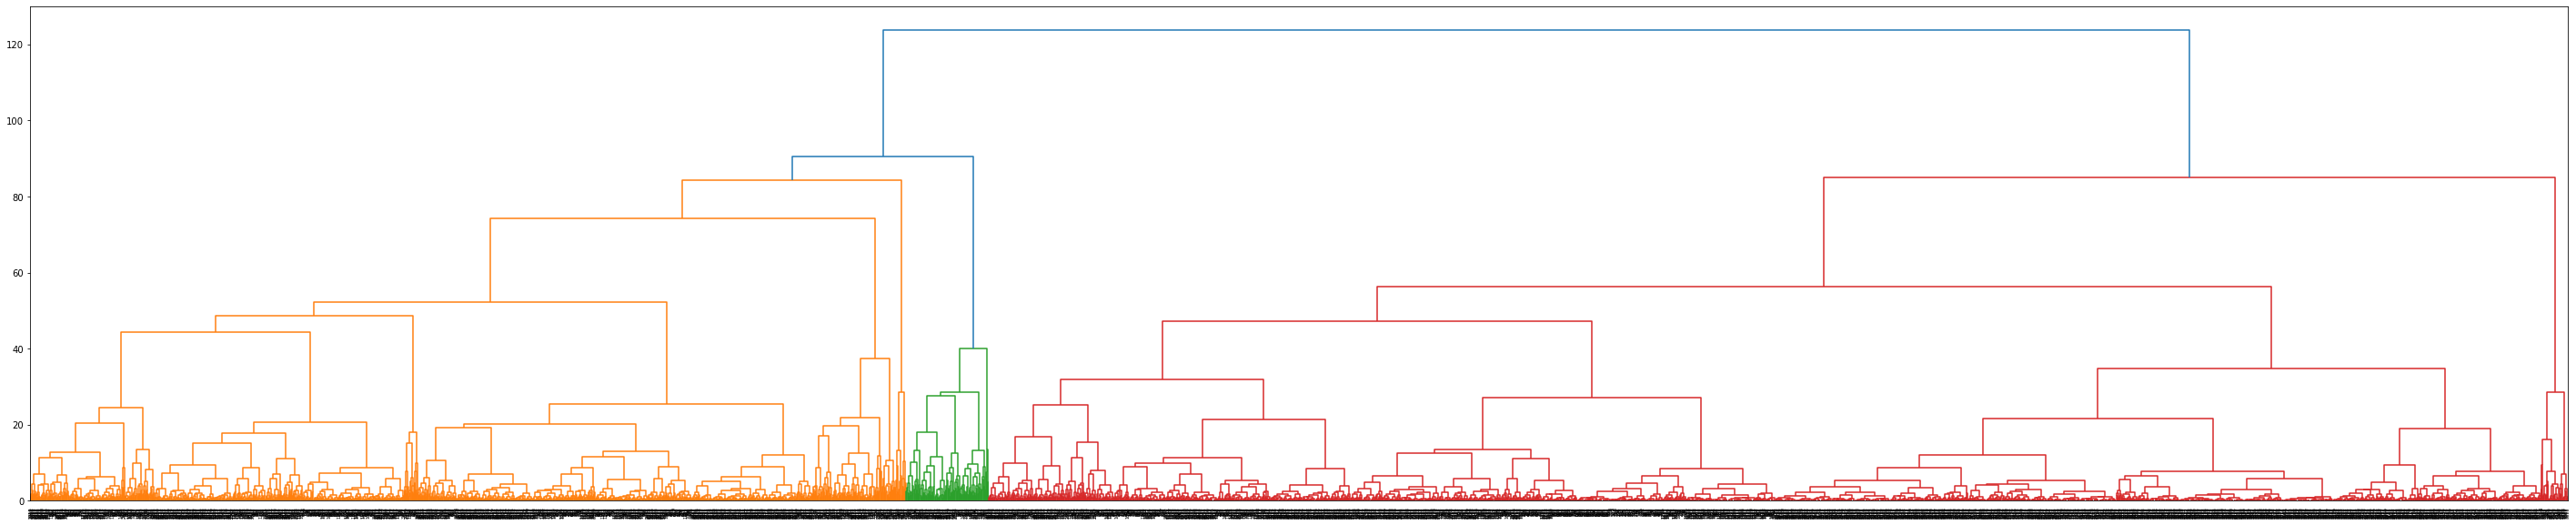

In [17]:
plt.figure(figsize=(50,10))
sch.dendrogram(sch.linkage(y=scaled_X_df, method='ward', metric='euclidean'),orientation='top',show_leaf_counts=True,distance_sort='descending')
plt.show()

In [18]:
mean_hierarchy=airlines_df.iloc[:,1:].groupby('label_hierarchy').agg('mean').round(2)
mean_hierarchy

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
label_hierarchy,,,,,,,,,,,
0,116134.23,367.78,3.50,1.00,1.00,36501.33,17.96,376.40,1.15,4699.64,0.67
1,46329.34,9.03,1.24,1.00,1.00,4868.11,6.91,214.81,0.67,3769.34,0.18
2,134880.89,393.32,2.43,1.00,1.00,36582.17,29.34,5915.52,16.64,4599.61,0.75
3,68876.58,23.26,1.14,2.35,1.00,14689.84,17.53,582.63,2.21,3968.93,0.40
4,129951.39,65.67,3.39,1.00,3.72,86259.89,26.22,422.22,1.33,4488.78,0.50


In [19]:
grouping=airlines_df.groupby('label_hierarchy')['ID#'].apply(lambda x: tuple(x))
grouping

label_hierarchy
0    (5, 7, 10, 12, 16, 17, 19, 20, 21, 22, 29, 31,...
1    (1, 2, 3, 4, 6, 8, 11, 13, 14, 15, 18, 23, 24,...
2    (51, 66, 97, 115, 124, 130, 138, 190, 195, 242...
3    (9, 202, 230, 386, 398, 568, 804, 951, 1161, 1...
4    (109, 348, 389, 861, 915, 1047, 1257, 1313, 18...
Name: ID#, dtype: object

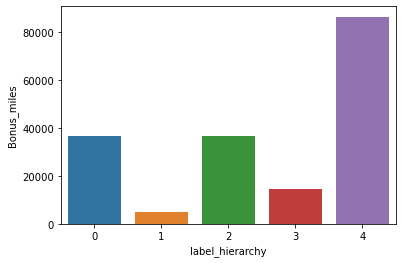

In [20]:
sns.barplot(x=mean_hierarchy.index,y='Bonus_miles',data=mean_hierarchy)
plt.show()

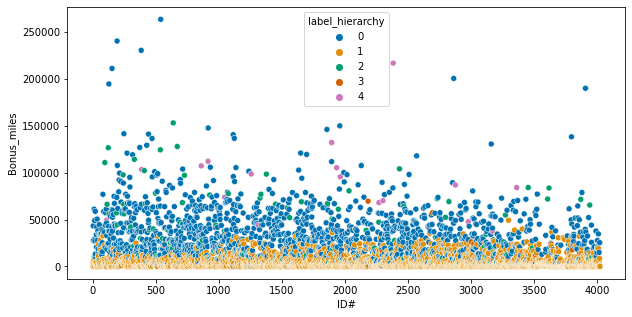

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ID#',y='Bonus_miles',hue='label_hierarchy',data=airlines_df,palette='colorblind')
plt.show()

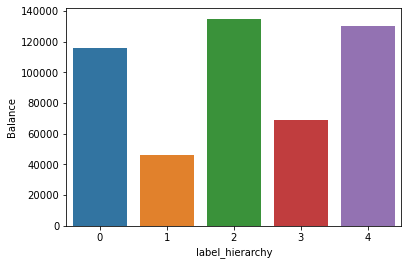

In [22]:
sns.barplot(x=mean_hierarchy.index,y='Balance',data=mean_hierarchy)
plt.show()

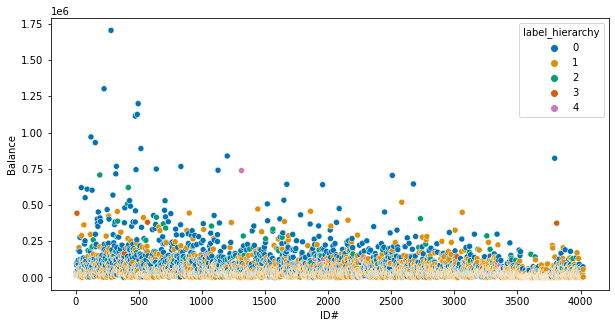

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ID#',y='Balance',hue='label_hierarchy',data=airlines_df,palette='colorblind')
plt.show()

### Inference :

* Created 5 clusters to segment customers.
* From Bar Plot we could see that Customers with different Balance are categorized
* From Scatter Plot we could see that Different Customer segments are categorized into 5 different colours

### Using KMeans Method

In [24]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=600,random_state=12,algorithm='auto')
label_kmeans=kmeans.fit_predict(scaled_X_df)

In [25]:
airlines_df['label_kmeans']=label_kmeans
airlines_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3


In [26]:
airlines_df['label_kmeans'].nunique()

5

In [27]:
airlines_df[airlines_df['label_kmeans']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [28]:
airlines_df[airlines_df['label_kmeans']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1,1
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,0,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0,1
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1


In [29]:
airlines_df[airlines_df['label_kmeans']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3,2
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,1,2
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,2,2
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,2,2
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,2,2
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,2,2
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2,2
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2,2


In [30]:
airlines_df[airlines_df['label_kmeans']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,0,3
3930,3953,40424,0,4,1,1,44110,26,343,3,1523,1,0,3
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,0,3
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,0,3


In [31]:
airlines_df[airlines_df['label_kmeans']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4,4
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,4,4
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,4,4
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,4,4
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,4,4
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,4,4
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,4,4
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,4,4
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,4,4
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,4,4


In [32]:
mean_kmeans=airlines_df.iloc[:,1:].groupby('label_kmeans').agg('mean').round(2)
mean_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy
label_kmeans,,,,,,,,,,,,
0,43328.07,78.32,1.30,1.02,1.00,4819.93,7.22,152.58,0.46,3618.54,0.00,0.99
1,57241.52,201.67,1.69,1.02,1.00,10660.01,10.58,405.16,1.22,4228.21,1.00,0.59
2,195173.10,796.16,2.21,1.04,1.00,32807.52,27.97,5545.36,16.34,4708.79,0.81,1.65
3,136933.86,134.66,4.10,1.00,1.00,47683.34,19.63,357.80,1.08,5069.96,0.58,0.04
4,138061.40,78.80,3.47,1.00,4.07,93927.87,28.07,506.67,1.60,4613.87,0.53,4.00


In [33]:
grouping=airlines_df.groupby('label_kmeans')['ID#'].apply(lambda x: tuple(x))
grouping

label_kmeans
0    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
1    (8, 18, 20, 22, 30, 37, 40, 46, 48, 54, 58, 71...
2    (9, 43, 51, 66, 97, 115, 130, 138, 190, 195, 2...
3    (5, 7, 10, 12, 16, 17, 19, 21, 29, 31, 33, 36,...
4    (109, 389, 861, 915, 1047, 1257, 1313, 1895, 1...
Name: ID#, dtype: object

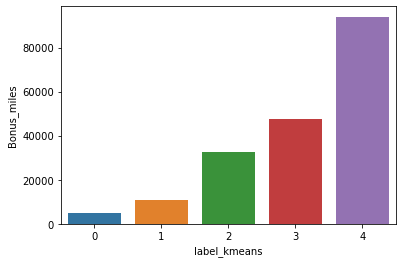

In [34]:
sns.barplot(x=mean_kmeans.index,y='Bonus_miles',data=mean_kmeans)
plt.show()

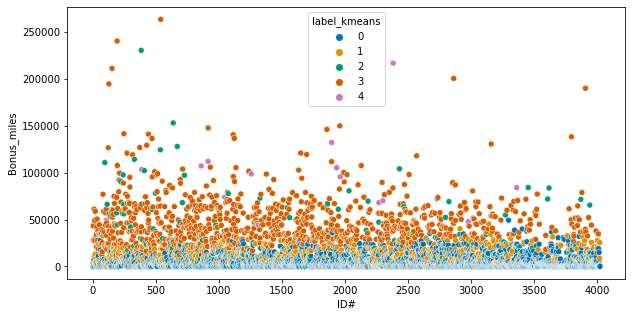

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ID#',y='Bonus_miles',hue='label_kmeans',data=airlines_df,palette='colorblind')
plt.show()

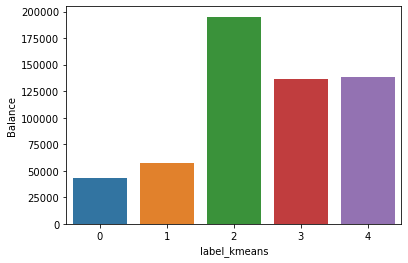

In [36]:
sns.barplot(x=mean_kmeans.index,y='Balance',data=mean_kmeans)
plt.show()

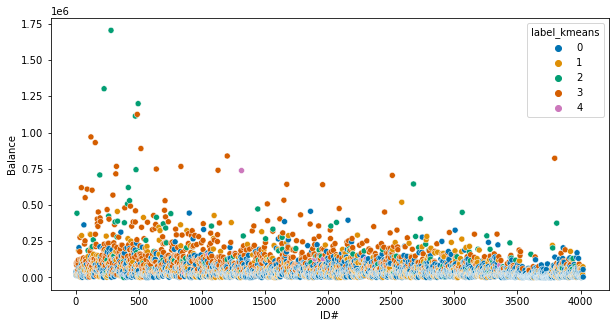

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ID#',y='Balance',hue='label_kmeans',data=airlines_df,palette='colorblind')
plt.show()

### Inference :

* Created 5 clusters to segment customers.
* From Bar Plot we could see that Customers with different Balance are categorized
* From Scatter Plot we could see that Different Customer segments are categorized into 5 different colours

### Using DBScan Method

In [38]:
dbscan=DBSCAN(eps=0.8,min_samples=5,metric='euclidean')
label_dbscan=dbscan.fit_predict(scaled_X_df)

In [39]:
airlines_df['label_dbscan']=label_dbscan
airlines_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans,label_dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3,-1


In [40]:
airlines_df['label_dbscan'].nunique()

9

In [41]:
mean_dbscan=airlines_df.iloc[:,1:].groupby('label_dbscan').agg('mean')
mean_dbscan

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,label_hierarchy,label_kmeans
label_dbscan,,,,,,,,,,,,,
-1,161634.467784,717.893041,2.657216,1.046392,1.063144,36198.028351,20.451031,1865.292526,5.426546,4670.824742,0.66366,0.722938,1.860825
0,50878.344410,0.673552,1.636731,1.000000,1.000000,8637.251908,8.150427,92.213740,0.306242,3789.942075,0.00000,0.862146,0.378536
1,55080.808577,2.092050,2.547071,1.000000,1.000000,21197.231172,12.234310,189.577406,0.610879,4469.053347,1.00000,0.392259,1.652720
2,271963.166667,0.000000,5.000000,1.000000,1.000000,64239.500000,16.666667,666.666667,1.500000,5709.333333,1.00000,0.000000,3.000000
3,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.00000,3.000000,0.000000
4,33354.600000,0.000000,1.000000,3.000000,1.000000,14966.000000,14.200000,50.000000,0.200000,4205.000000,0.00000,3.000000,0.000000
5,57404.500000,0.000000,5.000000,1.000000,1.000000,70048.000000,30.250000,262.500000,0.750000,4100.250000,1.00000,0.000000,3.000000
6,27786.666667,2621.500000,1.000000,1.000000,1.000000,1587.500000,1.500000,66.666667,0.500000,1841.000000,0.00000,0.000000,0.000000
7,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.00000,0.000000,1.714286


In [42]:
grouping=airlines_df.groupby('label_dbscan')['ID#'].apply(lambda x: tuple(x))
grouping

label_dbscan
-1    (5, 9, 10, 22, 23, 25, 33, 36, 43, 44, 46, 51,...
 0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 24, 26, 27,...
 1    (8, 12, 16, 17, 18, 19, 20, 21, 29, 30, 37, 39...
 2                     (842, 891, 943, 995, 1008, 1749)
 3    (804, 1161, 1556, 1993, 2335, 2440, 2763, 2928...
 4                       (1283, 1808, 1935, 2296, 3802)
 5                             (1827, 1916, 2150, 2313)
 6                 (2815, 3074, 3142, 3294, 3443, 3666)
 7           (3592, 3624, 3642, 3883, 3997, 4003, 4014)
Name: ID#, dtype: object

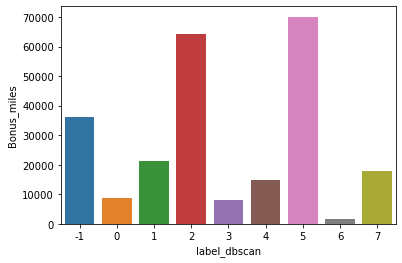

In [43]:
sns.barplot(x=mean_dbscan.index,y='Bonus_miles',data=mean_dbscan)
plt.show()

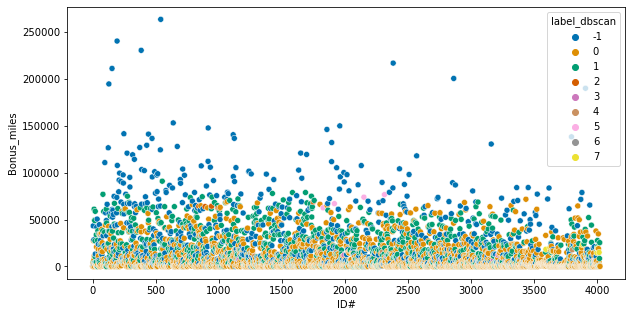

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ID#',y='Bonus_miles',hue='label_dbscan',data=airlines_df,palette='colorblind')
plt.show()

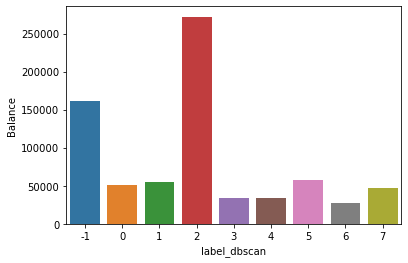

In [45]:
sns.barplot(x=mean_dbscan.index,y='Balance',data=mean_dbscan)
plt.show()

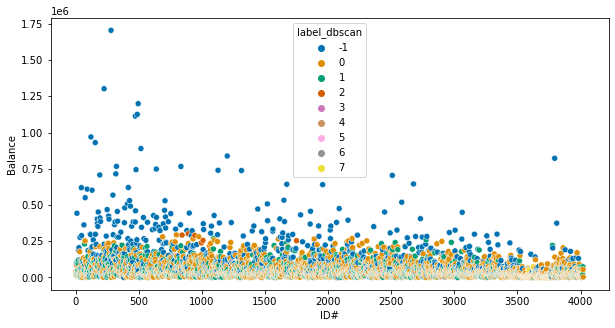

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ID#',y='Balance',hue='label_dbscan',data=airlines_df,palette='colorblind')
plt.show()

### Inference :

* Created 9 clusters to segment customers.
* From Bar Plot we could see that Customers with different Balance are categorized
* From Scatter Plot we could see that Different Customer segments are categorized into 9 different colours

### Find Optimum number of Clusters

#### Elbow Method - by finding wcss/inertia

In [47]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    clusters=kmeans.fit_predict(scaled_X_df)
    wcss.append(kmeans.inertia_)
print('clusters are :',np.unique(clusters))
list(enumerate(wcss))

clusters are : [0 1 2 3 4 5 6 7 8 9]


[(0, 43989.000000000015),
 (1, 35409.51662986132),
 (2, 30899.709743249496),
 (3, 27154.035327088186),
 (4, 24885.49624199955),
 (5, 22304.458913056424),
 (6, 19502.856098220505),
 (7, 17316.75360435649),
 (8, 15960.424188770641),
 (9, 14728.674847210159)]

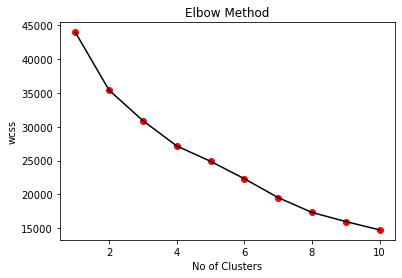

In [48]:
plt.plot(range(1,11),wcss,color='black')
plt.scatter(range(1,11),wcss,color='red')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

##### From Elbow method, we can assume that Optimum number of clusters are 2

### silhouette Score

In [49]:
inertia=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=True)
    y=kmeans.fit_predict(scaled_X_df)
    inertia.append(silhouette_score(scaled_X_df,y))
print('clusters are :',np.unique(y))
list(enumerate(inertia))

clusters are : [0 1 2 3 4 5 6 7 8]


[(0, 0.3256981835090824),
 (1, 0.31191384766627117),
 (2, 0.3079913268658421),
 (3, 0.323851169313525),
 (4, 0.27876199546481856),
 (5, 0.2211341657539037),
 (6, 0.23680303467419028),
 (7, 0.29836040406875247)]

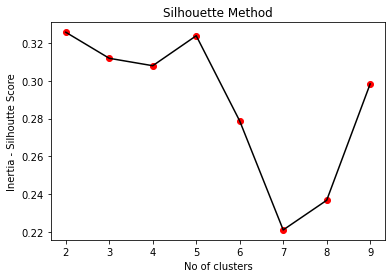

In [50]:
plt.plot(range(2,10),inertia,color="black")
plt.scatter(range(2,10),inertia,color="red")
plt.title('Silhouette Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia - Silhoutte Score')
plt.show()

##### From Silhouette Score method, we can assume that Optimum number of clusters are 3

#### calinski harabasz score

In [51]:
inertia=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=True)
    y=kmeans.fit_predict(scaled_X_df)
    inertia.append(calinski_harabasz_score(scaled_X_df,y))
print('clusters are :',np.unique(y))
list(enumerate(inertia))

clusters are : [0 1 2 3 4 5 6 7 8]


[(0, 968.4464517601235),
 (1, 846.4043669882087),
 (2, 825.5287346855238),
 (3, 854.2793284247352),
 (4, 837.5811701109369),
 (5, 861.6890467115667),
 (6, 878.1663765548279),
 (7, 868.7627959526374)]

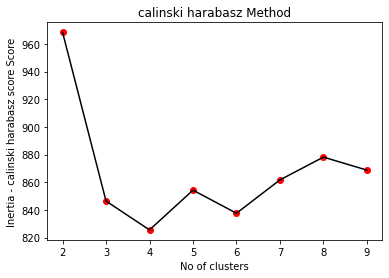

In [52]:
plt.plot(range(2,10),inertia,color="black")
plt.scatter(range(2,10),inertia,color="red")
plt.title('calinski harabasz Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia - calinski harabasz score Score')
plt.show()

##### From calinski harabasz method, we can assume that Optimum number of clusters are 3

### End !!!